In [0]:
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
import matplotlib.pyplot as plt


In [22]:
NUM_ITERS=5000
DISPLAY_STEP=100
BATCH=100

tf.set_random_seed(0)

# Download images and labels 
mnist = read_data_sets("MNISTdata", one_hot=True, reshape=False, validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNISTdata/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNISTdata/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNISTdata/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNISTdata/t10k-labels-idx1-ubyte.gz


In [0]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y_ = tf.placeholder(tf.float32, [None, 10])

In [0]:
# layers sizes
L1 = 200
L2 = 100
L3 = 60
L4 = 30
L5 = 10

In [0]:
# weights - initialized with random values from normal distribution mean=0, stddev=0.1
# output of one layer is input for the next
W1 = tf.Variable(tf.truncated_normal([784, L1], stddev=0.1))
b1 = tf.Variable(tf.zeros([L1]))

W2 = tf.Variable(tf.truncated_normal([L1, L2], stddev=0.1))
b2 = tf.Variable(tf.zeros([L2]))

W3 = tf.Variable(tf.truncated_normal([L2, L3], stddev=0.1))
b3 = tf.Variable(tf.zeros([L3]))

W4 = tf.Variable(tf.truncated_normal([L3, L4], stddev=0.1))
b4 = tf.Variable(tf.zeros([L4]))

W5 = tf.Variable(tf.truncated_normal([L4, L5], stddev=0.1))
b5 = tf.Variable(tf.zeros([L5]))

In [0]:
# flatten the images, unrole eacha image row by row, create vector[784] 
# -1 in the shape definition means compute automatically the size of this dimension
XX = tf.reshape(X, [-1, 784])

# Define model
Y1 = tf.nn.relu(tf.matmul(XX, W1) + b1)
Y2 = tf.nn.relu(tf.matmul(Y1, W2) + b2)
Y3 = tf.nn.relu(tf.matmul(Y2, W3) + b3)
Y4 = tf.nn.relu(tf.matmul(Y3, W4) + b4)
Ylogits = tf.matmul(Y4, W5) + b5
Y = tf.nn.softmax(Ylogits)

In [0]:
# we can also use tensorflow function for softmax
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [0]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [0]:
# training, 
learning_rate = 0.003
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

In [0]:
# matplotlib visualisation
allweights = tf.concat([tf.reshape(W1, [-1]), tf.reshape(W2, [-1]), tf.reshape(W3, [-1]), tf.reshape(W4, [-1]), tf.reshape(W5, [-1])], 0)
allbiases  = tf.concat([tf.reshape(b1, [-1]), tf.reshape(b2, [-1]), tf.reshape(b3, [-1]), tf.reshape(b4, [-1]), tf.reshape(b5, [-1])], 0)


In [0]:
# Initializing the variables
init = tf.global_variables_initializer()

train_losses = list()
train_acc = list()
test_losses = list()
test_acc = list()

saver = tf.train.Saver()

In [34]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)


    for i in range(NUM_ITERS+1):
        # training on batches of 100 images with 100 labels
        batch_X, batch_Y = mnist.train.next_batch(BATCH)
        
        if i%DISPLAY_STEP ==0:
            # compute training values for visualisation
            acc_trn, loss_trn, w, b = sess.run([accuracy, cross_entropy, allweights, allbiases], feed_dict={X: batch_X, Y_: batch_Y})
            
            
            acc_tst, loss_tst = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
            
            print("#{} Trn acc={} , Trn loss={} Tst acc={} , Tst loss={}".format(i,acc_trn,loss_trn,acc_tst,loss_tst))

            train_losses.append(loss_trn)
            train_acc.append(acc_trn)
            test_losses.append(loss_tst)
            test_acc.append(acc_tst)

        # the backpropagationn training step
        sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})

#0 Trn acc=0.029999999329447746 , Trn loss=231.37051391601562 Tst acc=0.08259999752044678 , Tst loss=230.74026489257812
#100 Trn acc=0.9200000166893005 , Trn loss=18.48563003540039 Tst acc=0.9104999899864197 , Tst loss=30.0662899017334
#200 Trn acc=0.9300000071525574 , Trn loss=21.898229598999023 Tst acc=0.9247000217437744 , Tst loss=24.906503677368164
#300 Trn acc=0.9300000071525574 , Trn loss=23.175193786621094 Tst acc=0.9462000131607056 , Tst loss=17.32414436340332
#400 Trn acc=0.9599999785423279 , Trn loss=18.573192596435547 Tst acc=0.9553999900817871 , Tst loss=14.554201126098633
#500 Trn acc=0.9800000190734863 , Trn loss=9.726351737976074 Tst acc=0.9484999775886536 , Tst loss=16.255306243896484
#600 Trn acc=0.9800000190734863 , Trn loss=5.884757995605469 Tst acc=0.958299994468689 , Tst loss=13.967975616455078
#700 Trn acc=0.9399999976158142 , Trn loss=15.872597694396973 Tst acc=0.9645000100135803 , Tst loss=11.500598907470703
#800 Trn acc=0.949999988079071 , Trn loss=17.102176666

#4000 Trn acc=1.0 , Trn loss=0.8950947523117065 Tst acc=0.9761000275611877 , Tst loss=8.80394458770752
#4100 Trn acc=1.0 , Trn loss=0.3854060173034668 Tst acc=0.9790999889373779 , Tst loss=8.352184295654297
#4200 Trn acc=1.0 , Trn loss=0.5743873715400696 Tst acc=0.9729999899864197 , Tst loss=11.065591812133789
#4300 Trn acc=0.9599999785423279 , Trn loss=9.507680892944336 Tst acc=0.9750000238418579 , Tst loss=10.400771141052246
#4400 Trn acc=0.9800000190734863 , Trn loss=11.432923316955566 Tst acc=0.9769999980926514 , Tst loss=8.938736915588379
#4500 Trn acc=0.9900000095367432 , Trn loss=1.4375605583190918 Tst acc=0.9789000153541565 , Tst loss=9.0053129196167
#4600 Trn acc=0.9800000190734863 , Trn loss=4.476832389831543 Tst acc=0.9772999882698059 , Tst loss=9.140332221984863
#4700 Trn acc=0.9900000095367432 , Trn loss=3.653215169906616 Tst acc=0.9779999852180481 , Tst loss=10.211694717407227
#4800 Trn acc=1.0 , Trn loss=1.6527360677719116 Tst acc=0.9775000214576721 , Tst loss=9.33879280

In [0]:
def losses_accuracies_plots(train_losses, train_acc, test_losses, test_acc,plot_title="Loss, train acc, test acc",step=100):
        
    training_iters = len(train_losses)
    # iters_steps
    iter_steps = [step *k for k in range(training_iters)]

    imh = plt.figure(1, figsize=(15, 14), dpi=160)
    # imh.tight_layout()
    # imh.subplots_adjust(top=0.88)

    final_acc = test_acc[-1]
    img_title = "{}, test acc={:.4f}".format(plot_title,final_acc)
    imh.suptitle(img_title)
    plt.subplot(221)
    #plt.plot(iter_steps,losses, '-g', label='Loss')
    plt.semilogy(iter_steps, train_losses, '-g', label='Trn Loss')
    plt.title('Train Loss ')
    plt.subplot(222)
    plt.plot(iter_steps, train_acc, '-r', label='Trn Acc')
    plt.title('Train Accuracy')

    plt.subplot(223)
    plt.semilogy(iter_steps, test_losses, '-g', label='Tst Loss')
    plt.title('Test Loss')
    plt.subplot(224)
    plt.plot(iter_steps, test_acc, '-r', label='Tst Acc')
    plt.title('Test Accuracy')


    #plt.tight_layout()
    plt.subplots_adjust(top=0.88)

    plot_file = "./plots/{}.png".format(plot_title.replace(" ","_"))
    plt.savefig(plot_file)
    plt.show()

FileNotFoundError: ignored

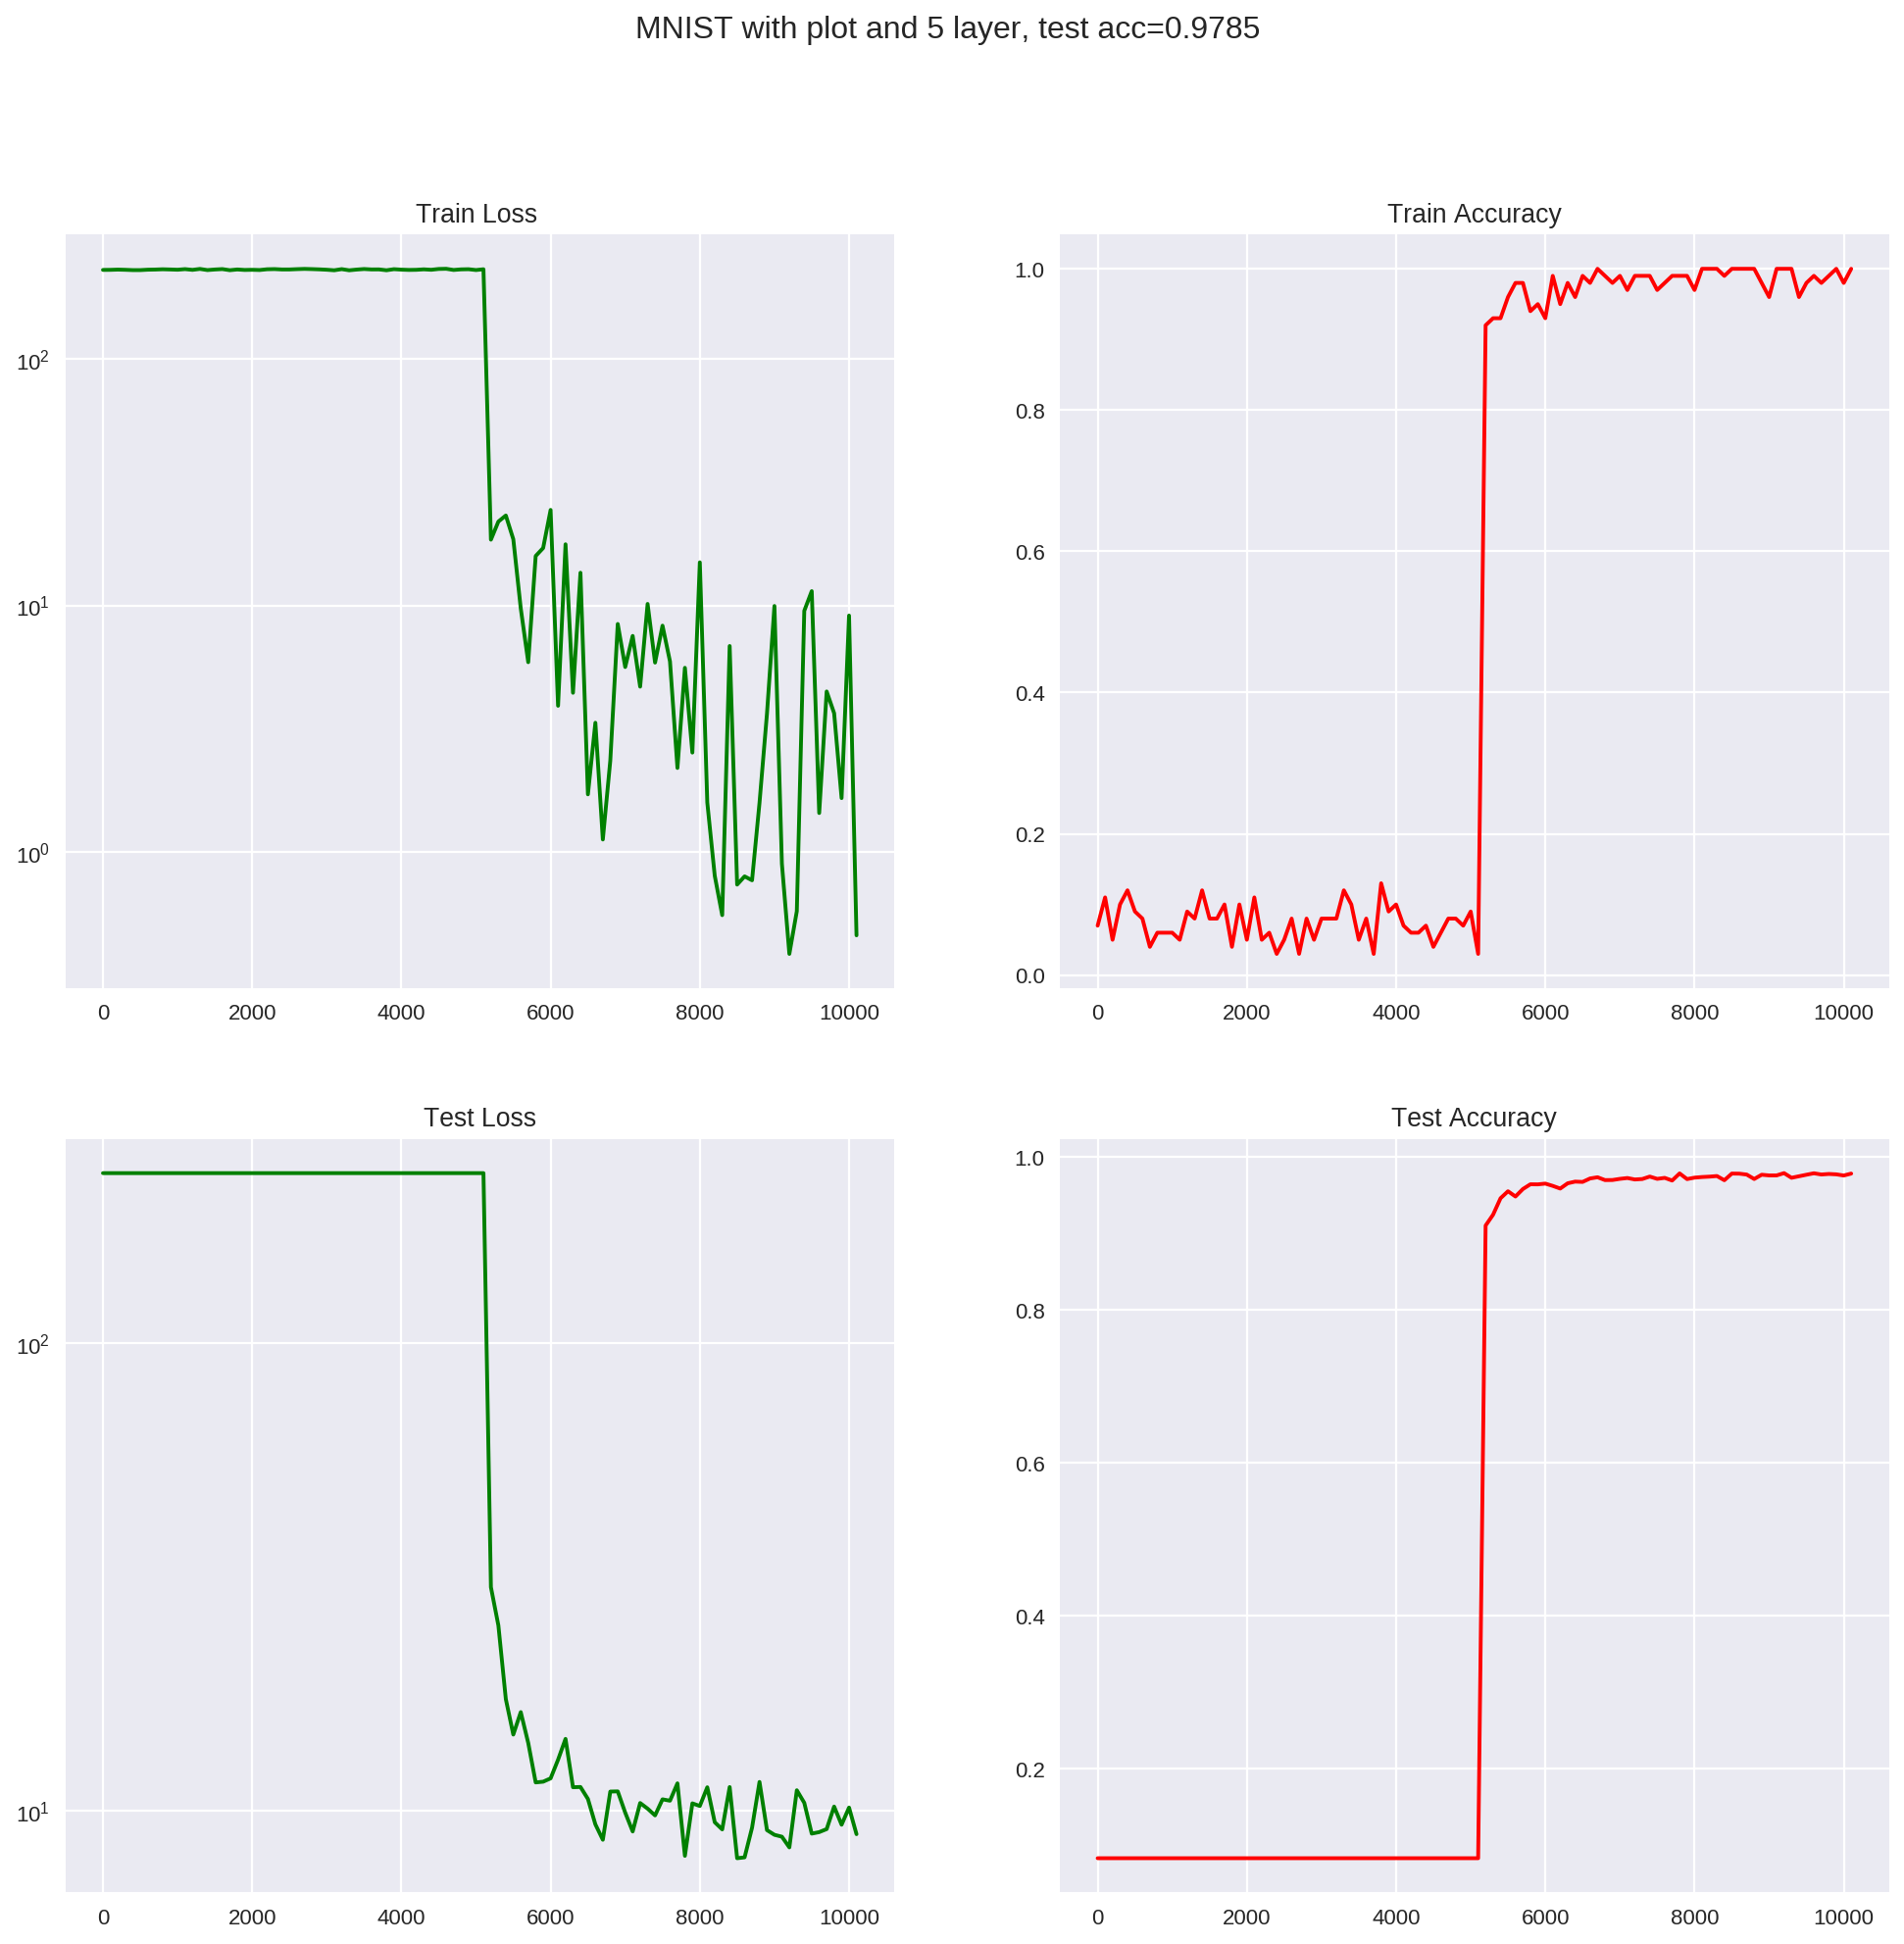

In [39]:
title = "MNIST with plot and 5 layer"
losses_accuracies_plots(train_losses,train_acc,test_losses, test_acc,title,DISPLAY_STEP)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC